In [1]:
import esm4ppe
import xarray as xr
from xhistogram.xarray import histogram
import numpy as np
from dask.diagnostics import ProgressBar

In [2]:
phytotypes = ['diat','diaz','pico','misc']
# Load ppp
vs = xr.Dataset()
for phytotype in phytotypes:
    variable = 'intpp'+phytotype
    print(variable)
    es = esm4ppe.esm4ppeObj(variable,'monthly')
    tmp = es.verify('ppp',groupby='month')[variable].isel(month=0)
    tmp = tmp.where(tmp>0,0)
    vs[phytotype] = tmp
# Load Pearson correlations
cr = xr.open_dataset(esm4ppe.sysconfig['correlationpathroot']+'pearson.intpp-limitfactor.deseseasoned.nc')

intppdiat
Opening static... static opened.
Opening skill metric.
intppdiaz
Opening static... static opened.
Opening skill metric.
intpppico
Opening static... static opened.
Opening skill metric.
intppmisc
Opening static... static opened.
Opening skill metric.


In [22]:
phytotype = 'pico'
lim = 'limfe'
bins = np.linspace(0,1,100)
hs = histogram(vs[phytotype],
               cr[lim+phytotype],
               bins=[bins,bins],
               dim=['xh','yh'],
               weights=es.static['areacello'],density=True)

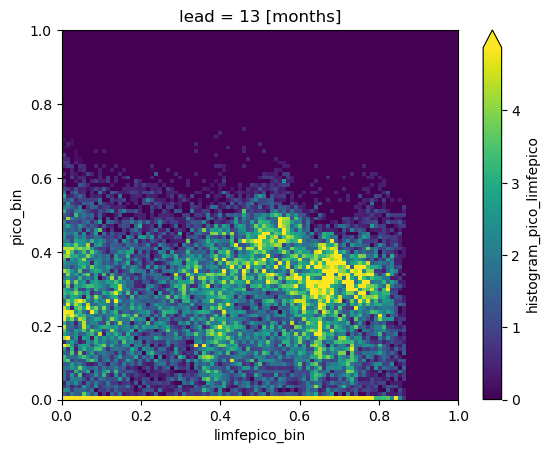

In [33]:
hs.isel(lead=12).plot(robust=True)